In [1]:
!pip install numpy
!pip install matplotlib
!pip install scipy

     |████████████████████████████████| 14.5 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 8.7 MB/s  eta 0:00:01
     |████████████████████████████████| 2.2 MB 34.4 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 29 kB/s  eta 0:00:01    |█▎                              | 1.0 MB 3.3 MB/s eta 0:00:08


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

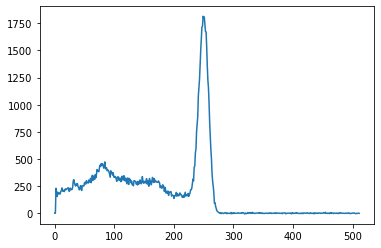

In [20]:
%matplotlib inline
Background1=np.genfromtxt('Background 1.TKA',dtype=float)
Background2=np.genfromtxt('Background 2.TKA',dtype=float)
Chan=np.arange(0,len(Background1),1)
bg=([])
for i in Chan:
    bg=np.append(bg,0.5*(Background1[i]+Background2[i]))


Cs0=np.genfromtxt('Caesium A 0.TKA',dtype=float)
plt.plot(Chan,(Cs0-bg))
plt.show()